In [1]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def polyfit(x,a,b): 
    return a*x**b

In [3]:
# 2020 Baseline sensitivity and discovery potential numbers 
Data = {}
Data['Baseline Sensitivity'] = {} 
# Data['Baseline Sensitivity']['Livetime'] = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
Data['Baseline Sensitivity']['Livetime'] = np.array([0.5, 1.0, 2.0, 5.0, 10.0])
Data['Baseline Sensitivity']['Halflife'] = np.array([1.387, 2.157, 3.659, 6.377, 9.899])*1E27
Data['Baseline Discovery'] = {} 
Data['Baseline Discovery']['Livetime'] = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
Data['Baseline Discovery']['Halflife'] = np.array([0.99, 1.64, 2.74, 3.41, 4.13, 4.74, 5.48, 6.02, 6.56, 6.98, 7.40])*1E27
Data['Baseline Discovery']['Counts'] = np.array([0.01, 4.38, 5.24, 6.38, 7.71, 8.47, 9.27, 9.57, 10.18, 10.67, 11.28, 11.81])

In [4]:
# Curve fit to smooth out curves
popt1, pcov1 = curve_fit(polyfit, Data['Baseline Sensitivity']['Livetime'], Data['Baseline Sensitivity']['Halflife'], p0=[1E27,1])
popt2, pcov2 = curve_fit(polyfit, Data['Baseline Discovery']['Livetime'], Data['Baseline Discovery']['Halflife'], p0=[1E27,1])
xs1 = np.linspace(0, 10, 1000)

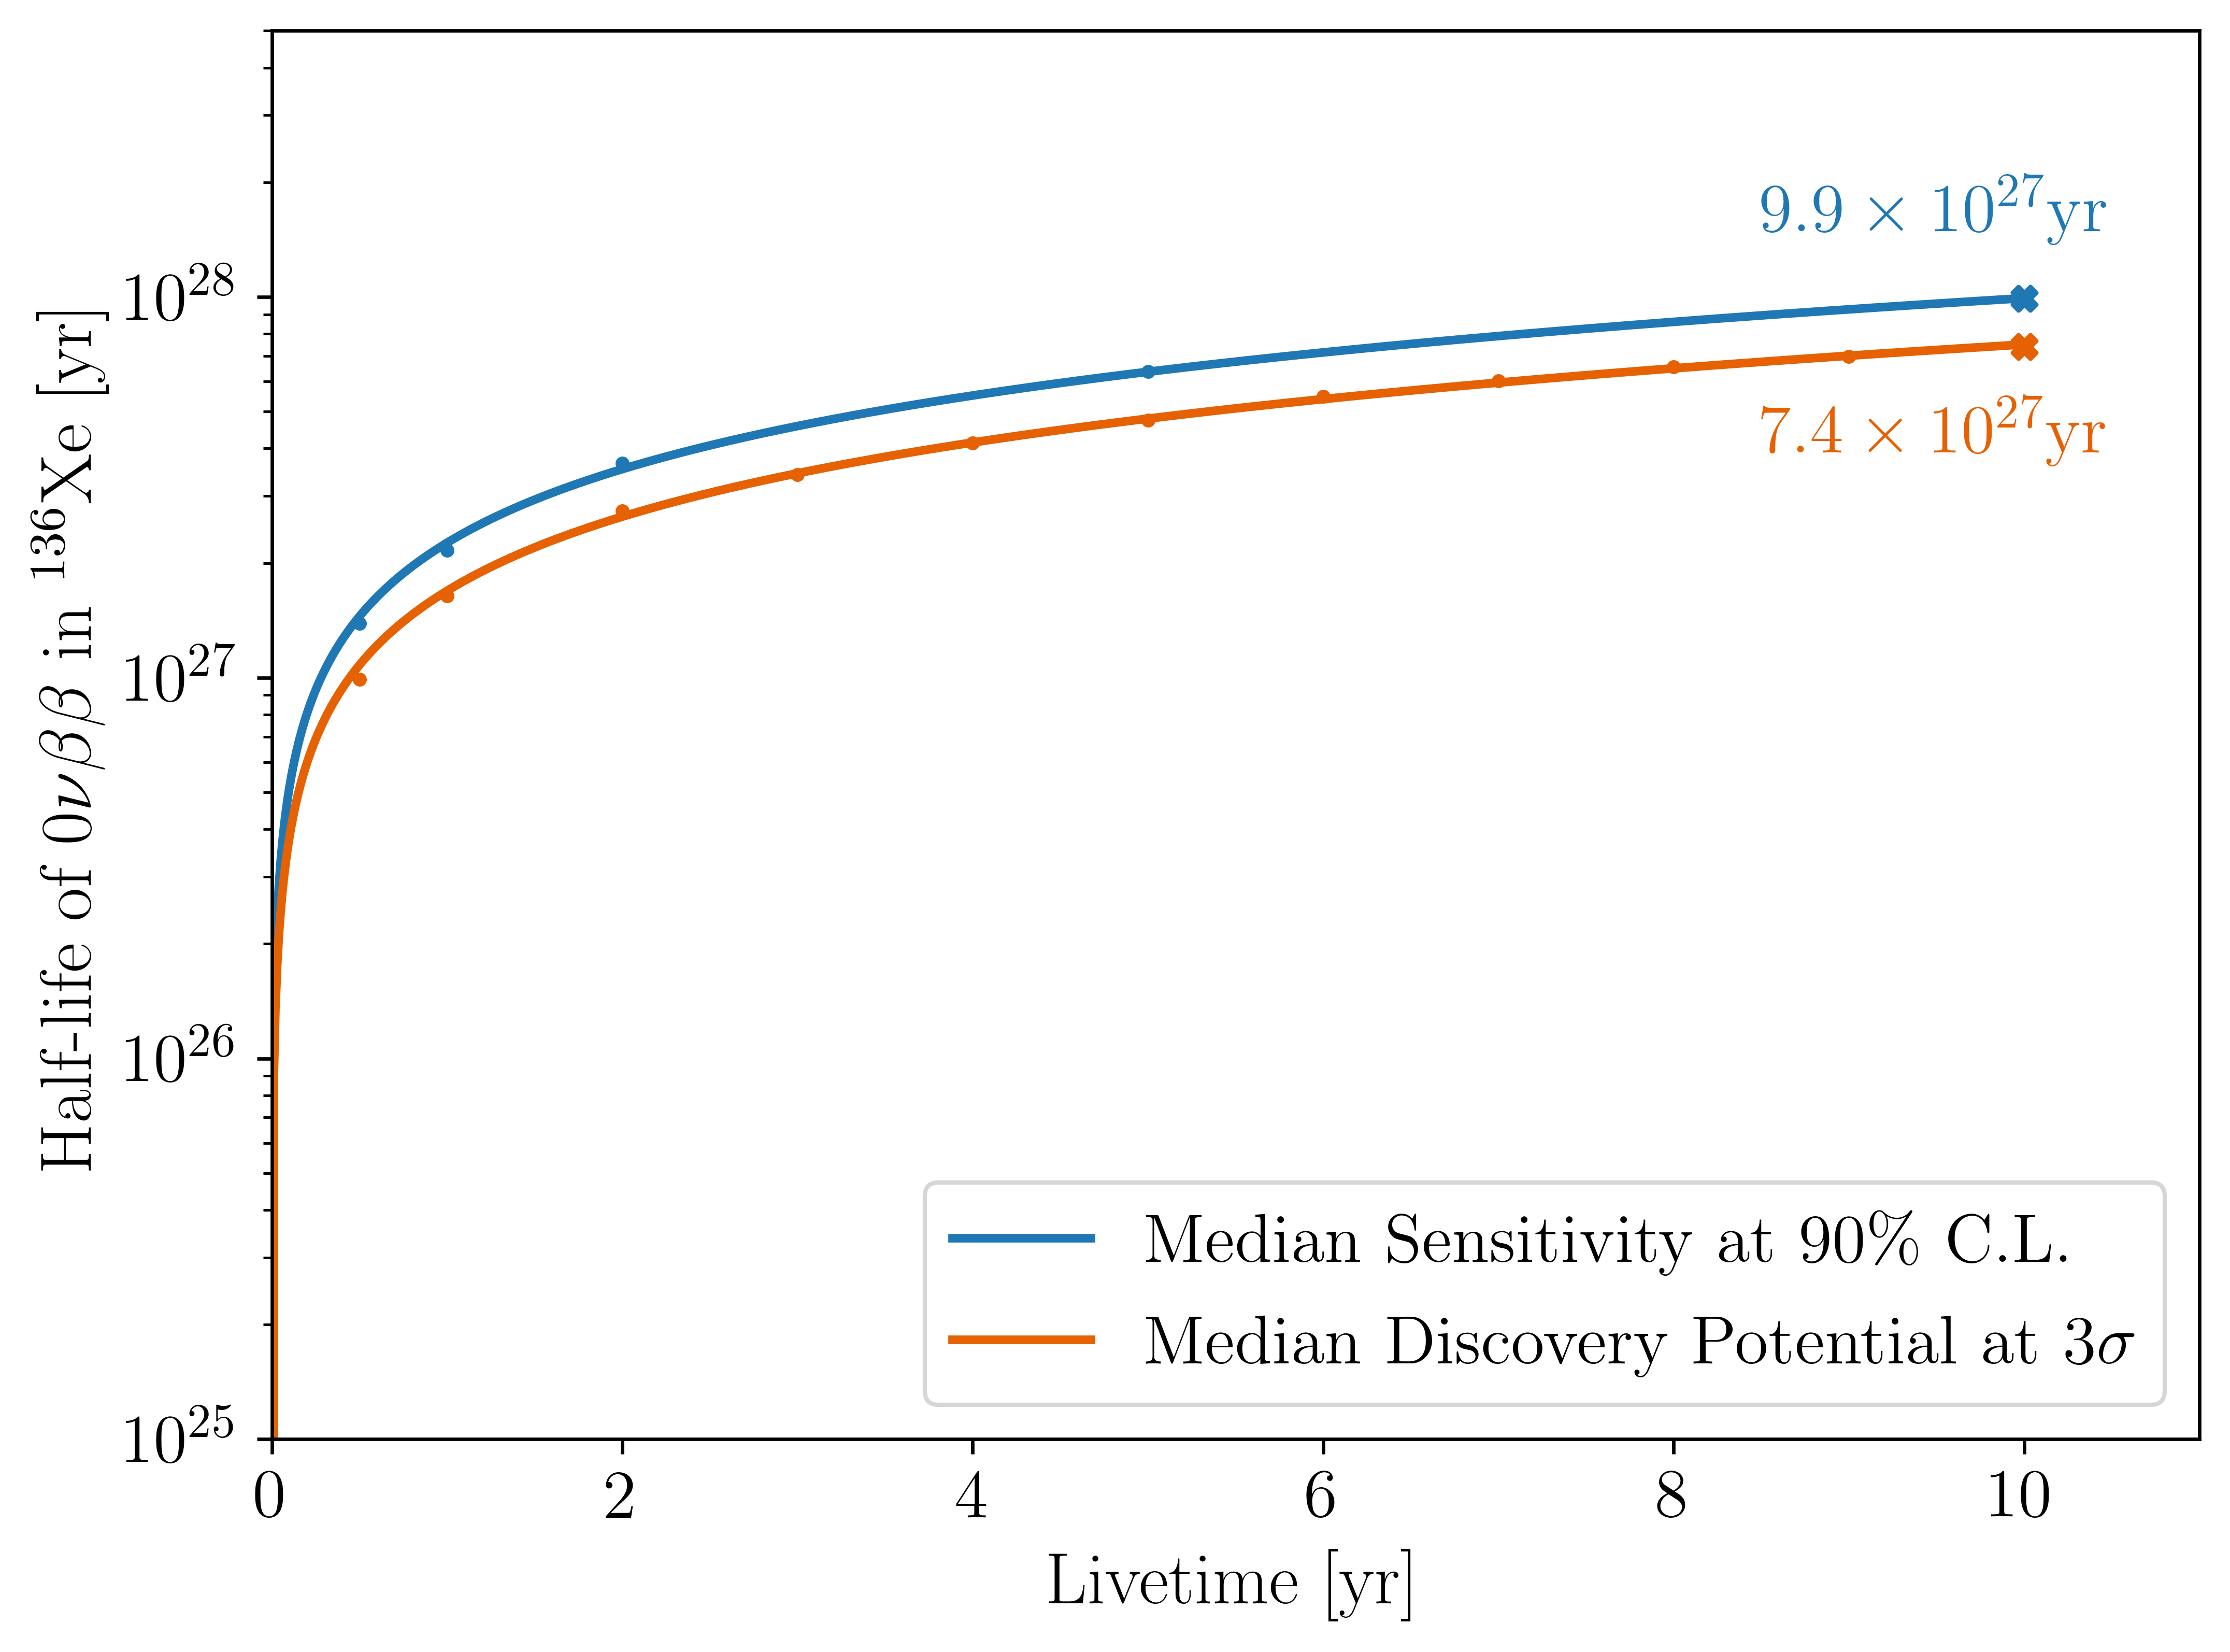

In [5]:
fig = plt.figure()
plt.xlabel('Livetime [yr]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [yr]')
plt.xlim(0,11)
plt.ylim(1E25,5E28)
plt.yscale('log')

# Scatter of individual results at different livetimes
# to be uncommennted for final plots for paper
plt.scatter(x=Data['Baseline Sensitivity']['Livetime'], 
            y=Data['Baseline Sensitivity']['Halflife'], 
            color=colors[0], label='', s=20, marker='.')
plt.scatter(x=Data['Baseline Discovery']['Livetime'], 
            y=Data['Baseline Discovery']['Halflife'], 
            label='', color=colors[1], s=20, marker='.')

plt.plot(xs1, polyfit(xs1, *popt1), 
         label='Median Sensitivity at 90\% C.L.', 
         color=colors[0])
plt.plot(xs1, polyfit(xs1, *popt2),
         label='Median Discovery Potential at $3\sigma$', 
         color=colors[1])

# Add marker for half-life after 10 years
plt.scatter(x=Data['Baseline Sensitivity']['Livetime'][-1], 
            y=Data['Baseline Sensitivity']['Halflife'][-1], 
            label='', marker='X', color=colors[0], s=30)
plt.scatter(x=Data['Baseline Discovery']['Livetime'][-1], 
            y=Data['Baseline Discovery']['Halflife'][-1], 
            label='', marker='X', color=colors[1], s=30)

# Add half-life after 10 years as text
plt.text(8.5, Data['Baseline Sensitivity']['Halflife'][-1]*1.5, '${:1.1f} \\times 10^{{{}}} \mathrm{{yr}}$'.format(Data['Baseline Sensitivity']['Halflife'][-1]/1E27, (np.floor(np.log10(Data['Baseline Sensitivity']['Halflife'][-1]))).astype(int)), color=colors[0], fontsize=16)
plt.text(8.5, Data['Baseline Discovery']['Halflife'][-1]/1.9, '${:1.1f} \\times 10^{{{}}} \mathrm{{yr}}$'.format(Data['Baseline Discovery']['Halflife'][-1]/1E27, (np.floor(np.log10(Data['Baseline Discovery']['Halflife'][-1]))).astype(int)), color=colors[1], fontsize=16)

plt.legend(loc='lower right')
plt.savefig('sens_dp_vs_livetime.png')